---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [0]:
import warnings
warnings.filterwarnings('ignore')


In [0]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

(21693, 30)
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21693 entries, 0 to 21692
Data columns (total 30 columns):
V1        21693 non-null float64
V2        21693 non-null float64
V3        21693 non-null float64
V4        21693 non-null float64
V5        21693 non-null float64
V6        21693 non-null float64
V7        21693 non-null float64
V8        21693 non-null float64
V9        21693 non-null float64
V10       21693 non-null float64
V11       21693 non-null float64
V12       21693 non-null float64
V13       21693 non-null float64
V14       21693 non-null float64
V15       21693 non-null float64
V16       21693 non-null float64
V17       21693 non-null float64
V18       21693 non-null float64
V19       21693 non-null float64
V20       21693 non-null float64
V21       21693 non-null float64
V22       21693 non-null float64
V23       21693 non-null float64
V24       21693 non-null float64
V25       21693 non-null float64
V26       21693 non-null float64
V27       21693 non-null float64
V28       21693 non-null float64
Amount    21693 non-null float64
Class     21693 non-null int64
dtypes: float64(29), int64(1)
memory usage: 5.0 MB
None

In [13]:
def answer_one():
    df = pd.read_csv('fraud_data.csv')
#     print(df.shape)
#     print(df.keys())
#     print(df.info())
    ans = len(df[df['Class']== 1]) / len(df[df['Class']== 0])
    
    # Your code here
    
    return ans

answer_one()  

0.016684632328818484

In [0]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [15]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    
    # Your code here
    
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    # Therefore the dummy 'most_frequent' classifier always predicts class 0
    y_dummy_predictions = dummy_majority.predict(X_test)

    ans = (accuracy_score(y_test, y_dummy_predictions), recall_score(y_test, y_dummy_predictions))
    
    return ans
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [16]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC

    # Your code here
    svm = SVC().fit(X_train, y_train)
    y_predictions = svm.predict(X_test)
    
    ans = (accuracy_score(y_test, y_predictions), recall_score(y_test, y_predictions), precision_score(y_test, y_predictions))
    
    return ans
answer_three()

(0.9907817109144543, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [17]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    svm = SVC(C = 1e9, gamma = 1e-07).fit(X_train, y_train)
    svm_predicted = svm.decision_function(X_test) > -220
    
#     print(svm_predicted)
    
    confusion = confusion_matrix(y_test, svm_predicted)
    
    ans = confusion
    
    return ans

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [18]:
def answer_five():
        
    # Your code here
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve

    lr = LogisticRegression().fit(X_train, y_train)
    
    y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
    
#     lr_predicted = lr.predict(X_test)
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
    closest_zero_p = np.argmin(np.abs(precision-0.75))
#     closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero_p]
    
#     print(closest_zero_r)
    
    
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
#     roc_auc_lr = auc(fpr_lr, tpr_lr)
    
    closest_zero_fpr_lr = np.argmin(np.abs(fpr_lr - 0.16))
#     closest_zero_p = precision[closest_zero]
    closest_zero_tpr_lr = recall[closest_zero_fpr_lr]
    
#     print(closest_zero_tpr_lr)

    
#     y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
    
#     confusion = confusion_matrix(y_test, lr_predicted)

    ans = (closest_zero_r, closest_zero_tpr_lr)
    
    return ans
answer_five()

(0.825, 0.9875)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [19]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    lr = LogisticRegression()

    grid_values = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

    # default metric to optimize over grid parameters
    grid_lr = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall')
    grid_lr.fit(X_train, y_train)
    
#     print(grid_lr.cv_results_['mean_test_score'].reshape(5,2))
    ans = np.array(grid_lr.cv_results_['mean_test_score'].reshape(5,2))
 
    return ans

answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.80797101]])

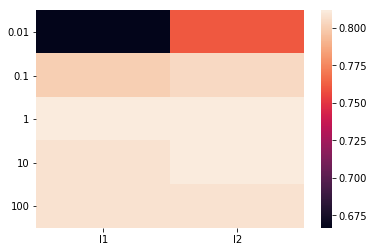

In [20]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
#     %matplotlib notebook
    %matplotlib inline

    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())